In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn import datasets
from sklearn import manifold

In [146]:
%matplotlib inline
data=datasets.fetch_openml('mnist_784',version=1,return_X_y=True)
pixel_values,target=data
pixel_values[0:4]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [148]:
target=target.astype(int)

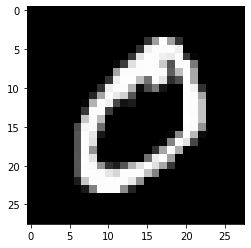

In [73]:
#visulaizing one of  the images
arr=pixel_values[1,:].reshape(28,28)
plt.imshow(arr,cmap='gray')

In [149]:
#using tsne to visualize the data distribution to give a feel for a unsupervised learning 
tnsne=manifold.TSNE(n_components=2,random_state=40)
data=tnsne.fit_transform(pixel_values[:3000,:])


In [150]:
raw_df=pd.DataFrame(data)
new_df=pd.concat([raw_df,pd.Series(target[:3000])],axis=1)
new_df.columns=['x','y','target']
new_df.head()

,x,y,target
0,-18.739674,19.721962,5
1,-33.144520,54.026306,0
2,49.650372,19.511154,4
3,0.759073,-57.012596,1
4,31.872740,0.774945,9


### two line of code hack from sklearn to get idea of a unsupervised/unlabelled datasets

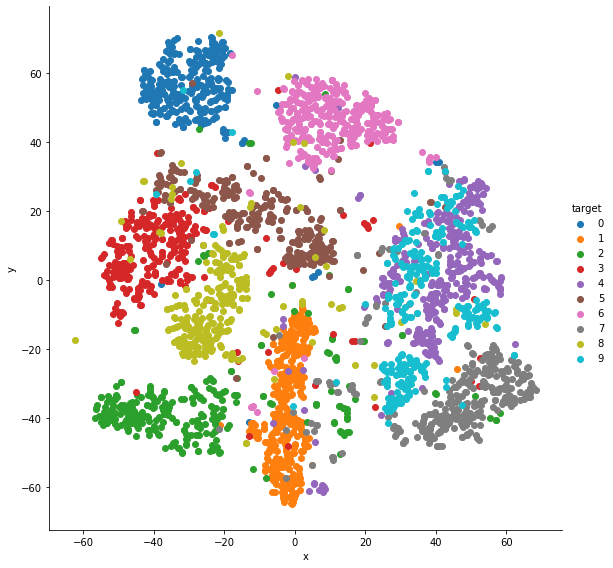

In [84]:
grid=sb.FacetGrid(new_df,hue='target',height=8)
grid.map(plt.scatter,'x','y').add_legend()

### implementing the cross validation

it is the most critical first step in building machine learning models,its very essential to ensure the dataset is balanced and free from bias

#### k-fold cross validation
it is one of the widely used cross validation techniques , where dataset is divided into k folds/subsets ,now some parts can be used for training and remaining part for validation and vice versa


In [86]:
from sklearn import model_selection

In [154]:
#splitting the dataset into k fold using sklearn.KFold method
new_df['kfold']=-1
new_df=new_df.sample(frac=1).reset_index(drop=True) #frac=1 for randomizing the sample and then reset_index for resetting the index
kf=model_selection.KFold(n_splits=5)
for fold,(train_index,test_index) in enumerate(kf.split(new_df)):
    new_df.loc[test_index,'kfold']=fold

In [155]:
#new_df.to_csv('train_folds.csv',index=True)
new_df['kfold'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

### stratified k-fold is used for skewed dataset

In [118]:
new_df.drop(['kfold'],axis=1,inplace=True)

In [119]:
new_df

,x,y,target
0,-11.686668,16.893547,5
1,52.202187,-35.845535,7
2,-17.642071,-21.798637,8
3,1.188695,-54.749718,1
4,56.852783,-34.839916,7
...,...,...,...
2995,-18.965612,-14.397702,8
2996,-2.736743,-30.986164,1
2997,-21.985062,49.560772,0
2998,-37.610481,54.967548,0


In [151]:
skf=model_selection.StratifiedKFold(n_splits=5)
new_df=new_df.sample(frac=1).reset_index(drop=True)
y=new_df.target.values
new_df['kfold']=-1
for fold,(t,v) in enumerate(skf.split(X=new_df,y=y)):
    new_df.loc[v,'kfold']=fold

In [153]:
new_df.to_csv('stratified_train_fold.csv',index=False)